In [70]:
#https://www.inf.ufpr.br/lesoliveira/download/IJCNN2016-BC.pdf
#https://www.kaggle.com/datasets/ambarish/breakhis

In [59]:
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path 
import os 
import pandas as pd

## Assembling dataframe with imagepath, label, zoomlvl, cancertype

In [64]:
import os
import pandas as pd 
def get_pngs_recursively_from_dir(dir_path):
    png_files = []
    for root, directories, files in os.walk(dir_path):
        for file in files:
            if os.path.splitext(file)[1] == '.png':
                file_path = os.path.join(root, file)
                abs_file_path = os.path.abspath(file_path)
                png_files.append(abs_file_path)
    return png_files
    
m_ductal = "SOB_M_DC"
m_lobular = "SOB_M_LC"
m_mucinous = "SOB_M_MC"
m_papillary = "SOB_M_PC"

b_adenosis = "SOB_B_A"
b_fibroadenoma = "SOB_B_F"
b_phyllodes = "SOB_B_PT"
b_tadenoma = "SOB_B_TA"

png_paths = get_pngs_recursively_from_dir("data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast")
    
df = pd.DataFrame(columns=["img_path", "zoom_level", "type", "malignant"])
for path in png_paths:
    if "400X" in path: zoom_level = 400
    elif "200X" in path: zoom_level = 200
    elif "100X" in path: zoom_level = 100
    elif "40X" in path: zoom_level = 40
    if m_ductal in path: 
        ttype = "ductal"
        malignant = 1
    elif m_lobular in path: 
        ttype = "lobular"
        malignant = 1
    elif m_mucinous in path: 
        ttype = "mucinous"
        malignant = 1
    elif m_papillary in path: 
        ttype = "papillary"
        malignant = 1
    elif b_adenosis in path: 
        ttype = "adenosis"
        malignant = 0
    elif b_fibroadenoma in path: 
        ttype = "fibroadenoma"
        malignant = 0
    elif b_phyllodes in path: 
        ttype = "phyllodes"
        malignant = 0
    elif b_tadenoma in path: 
        ttype = "tadenoma"
        malignant = 0
    row = pd.Series({"img_path": path, "zoom_level": zoom_level, "type": ttype, "malignant": malignant})
    df = pd.concat([df, row.to_frame().T], ignore_index=True, sort=False)
df.to_csv('data/BreaKHis_v1/imgpath_zoomlvl_type_malignant.csv', index=False)

### Showing lengths 

In [72]:
df = pd.read_csv("data/BreaKHis_v1/imgpath_zoomlvl_type_malignant.csv")
mal_len = len(df[df.malignant == 1])
print(f"Number of malignant examples: {mal_len}")
ben_len = len(df[df.malignant == 0])
print(f"Number of benign examples: {ben_len}")

Number of malignant examples: 5429
Number of benign examples: 2480


# Show 10 random imgs of each type and zoomlvl

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the DataFrame
df = pd.read_csv("data/BreaKHis_v1/imgpath_zoomlvl_type_malignant.csv")

# Group the DataFrame by zoom_level and type
groups = df.groupby(["type", "zoom_level"])

# Sample 10 random images from each group
samples = groups.apply(lambda x: x.sample(n=10, random_state=42))

print(len(samples))
# Loop over the samples and plot the images
# for idx, row in samples.iterrows():
#     img = plt.imread(row["img_path"])
#     plt.imshow(img)
#     plt.title(f"Zoom level: {row['zoom_level']}, Type: {row['type']}")
#     plt.axis("off")
#     plt.show()

320


In [69]:
len(png_paths)

7909

(460, 700, 3)


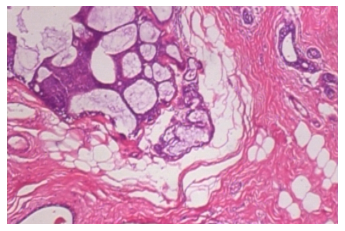

In [19]:
benign = Path("data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB")
malignant = Path("data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/")

benign_adenosis_slide1_400x = benign / "SOB/adenosis/SOB_B_A_14-22549AB/400X/"

#SOB_B_A-14-22549AB-400-022.png 

example1 = benign_adenosis_slide1_400x / "SOB_B_A-14-22549AB-400-001.png"
example2 = benign_adenosis_slide1_400x / "SOB_B_A-14-22549AB-400-022.png"

img = Image.open("data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-16456/40X/SOB_M_MC-14-16456-40-005.png")

# Convert the image to a numpy array
img_arr = np.array(img)
print(img_arr.shape)

# Show the image using matplotlib
plt.imshow(img_arr, cmap='gray')
plt.axis('off')
plt.show()